<a href="https://colab.research.google.com/github/Eminent01/Baum-Tenpers-Research/blob/main/Baum_Tenper_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These colab notebook is for the algorithm implimentation of the GARCH Neural network, Linear,LASSO, Ridge and Elastic net regression

Let's first call out all the required package for the algorithm

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as date
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import timedelta

Importing the Data set from the local Drive

In [ ]:
data = pd.read_csv("/content/NSE 30 Historical Data.csv" , thousands =',')

In [ ]:
# data = pd.read_csv("/content/NSE All Share Historical Data.csv" , thousands =',')

In [ ]:
data.set_index('Date', inplace=True)
data.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Feb 03, 2012",942.22,938.12,942.49,936.86,-,0.44%
"Feb 02, 2012",938.12,936.18,938.18,931.00,-,0.30%
"Feb 01, 2012",935.36,936.70,940.17,934.06,-,-0.15%
"Jan 31, 2012",936.78,928.22,937.04,928.13,-,0.92%
"Jan 30, 2012",928.22,936.13,936.81,928.07,-,-0.84%


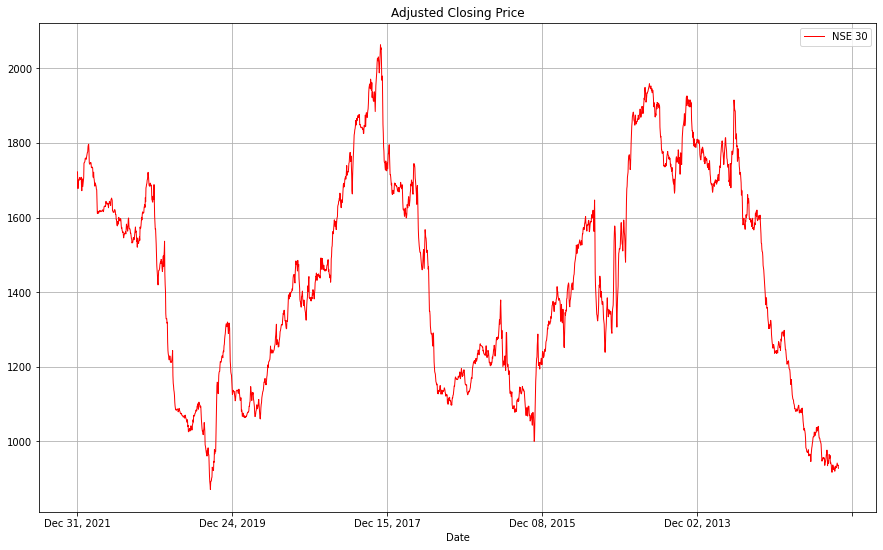

In [ ]:
data['Price'].plot(label='NSE 30', figsize=(15, 9), title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [ ]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it
close_col = data['Price']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

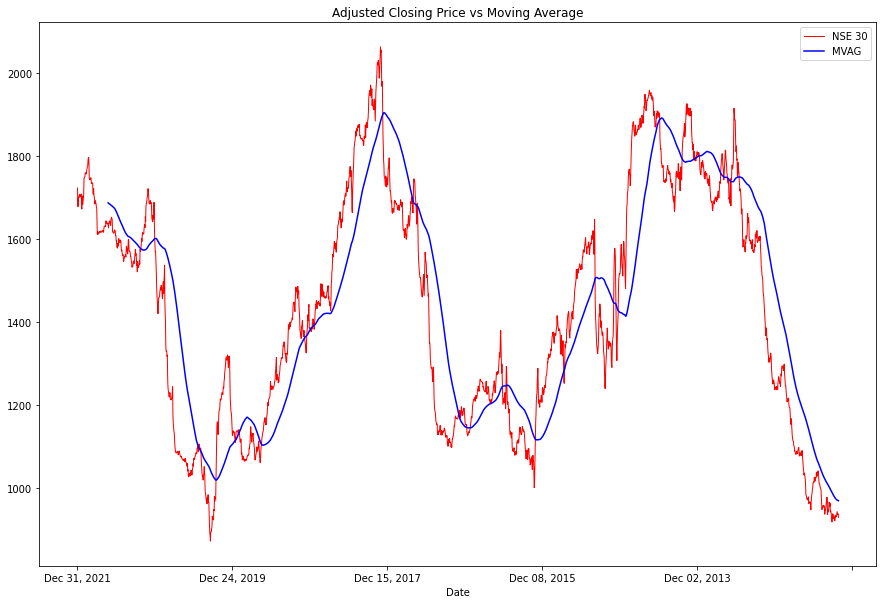

In [ ]:
# Visualizing Rolling Mean and Adjusted Closing Price together
data['Price'].plot(label='NSE 30', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

In [ ]:
# Data engineering 
data['Vol.'] = data['Vol.'].str.replace('M', "")
data['Change %'] = data['Change %'].str.replace('%', "")
# data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Vol.'] = pd.to_numeric(data['Vol.'], errors ='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors ='coerce')

In [ ]:
#Checking the dimension of the dataset
data.shape

(2457, 6)

In [ ]:
#Printing the first 5 rows of the dataset 
data.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Dec 31, 2021",1722.30,1677.94,1723.30,1675.71,268.50,2.67
"Dec 30, 2021",1677.48,1677.67,1678.33,1674.86,123.11,-0.01
"Dec 29, 2021",1677.67,1700.61,1702.19,1674.41,75.89,-1.35
"Dec 24, 2021",1700.61,1699.87,1700.99,1698.59,63.63,0.13
"Dec 23, 2021",1698.44,1699.38,1700.27,1697.25,63.39,-0.06


In [ ]:
#Summary statistics of the data
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,2457.000000,2457.000000,2457.000000,2457.000000,1156.000000,2457.000000
mean,1432.597570,1432.248433,1439.576675,1424.337566,193.019464,0.030077
std,285.008179,285.073439,286.068201,283.587090,124.748674,1.031463
min,871.260000,871.960000,884.640000,870.340000,38.030000,-5.540000
25%,1178.550000,1178.020000,1184.190000,1172.850000,109.785000,-0.450000
50%,1424.600000,1421.800000,1433.640000,1415.660000,159.710000,-0.010000
75%,1683.720000,1682.940000,1689.430000,1675.440000,238.182500,0.480000
max,2062.610000,2062.610000,2073.000000,2038.690000,970.690000,8.790000


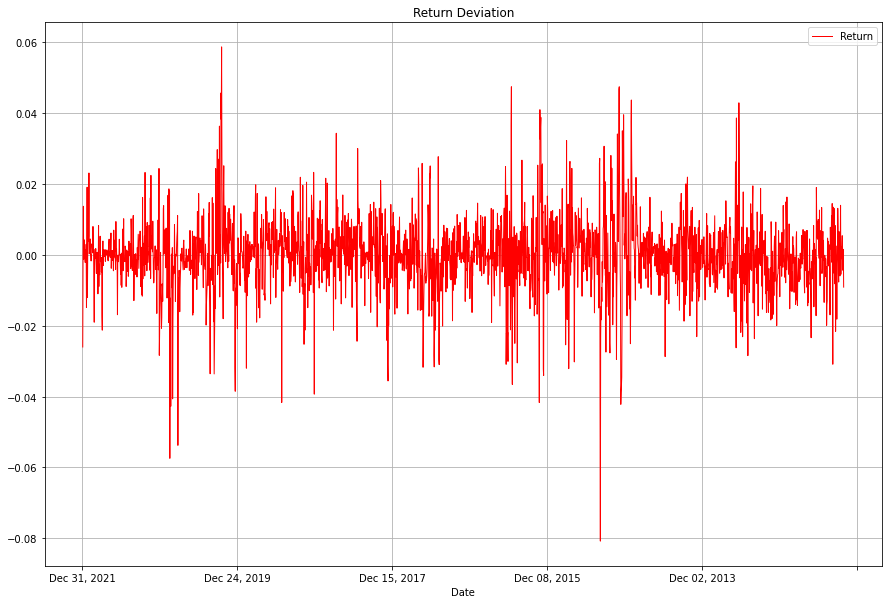

In [ ]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome
rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

##Exploratory Data Analysis

In [ ]:
#Correlation of the variables to check the importance of all the variables with thenprice variable
data.corr()

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.998730,0.999504,0.999393,0.145302,0.012553
Open,0.998730,1.000000,0.999403,0.999381,0.135238,-0.036340
High,0.999504,0.999403,1.000000,0.999155,0.149434,-0.009854
Low,0.999393,0.999381,0.999155,1.000000,0.131777,-0.011766
Vol.,0.145302,0.135238,0.149434,0.131777,1.000000,0.200179
Change %,0.012553,-0.036340,-0.009854,-0.011766,0.200179,1.000000


In [ ]:
data = data.drop(['Vol.'], axis= 1)
data.dropna(axis= 0, inplace = True)

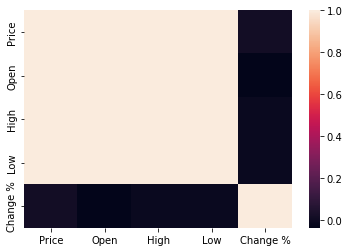

In [ ]:
#Heatmap plot 
corrmap=sns.heatmap(data.corr())

In [ ]:
## Saving the heatmap plot
plt.savefig('corrmap.jpeg')

<Figure size 432x288 with 0 Axes>

In [ ]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2456 entries, Dec 30, 2021 to Jan 30, 2012
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2456 non-null   float64
 1   Open      2456 non-null   float64
 2   High      2456 non-null   float64
 3   Low       2456 non-null   float64
 4   Change %  2456 non-null   float64
dtypes: float64(5)
memory usage: 115.1+ KB


#Histogram for the price

(array([111., 286., 346., 317., 254., 258., 362., 294., 187.,  42.]),
 array([ 871.26 ,  990.395, 1109.53 , 1228.665, 1347.8  , 1466.935,
        1586.07 , 1705.205, 1824.34 , 1943.475, 2062.61 ]),
 <a list of 10 Patch objects>)

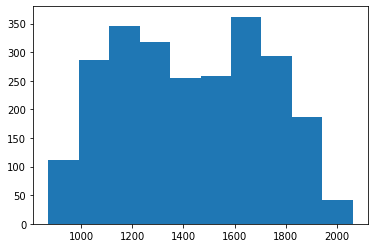

In [ ]:
plt.hist(data['Price'])

###Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


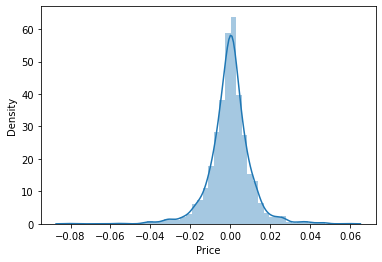

In [ ]:
sns.distplot(rd)

In [ ]:
# Number of days for which to predict the stock prices
predict_days = 30

In [ ]:
# Shifting by the Number of Predict days for Prediction array
data['Prediction'] = data['Price'].shift(-predict_days)

In [ ]:
# Dropping the Prediction Row
X = np.array(data.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(2427, 6)


In [ ]:
# Creating the Prediction Row
y = np.array(data['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(2427,)


In [ ]:
# Splitting the data into Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1941, 6)
(1941,)
(486, 6)
(486,)


#Transformation of the data

In [ ]:
# from scipy.special import inv_boxcox
# from typing import Tuple

In [ ]:
# # Define power trnnsformations and their inverses
# # Square root transformation
# def square_root_transformation(x: pd.Series) -> pd.Series:
#     return np.sqrt(x)

# def square_root_inverse_transformation(x: pd.Series) -> pd.Series:
#     return np.square(x)

# # Cube root transformation
# def cube_root_transformation(x: pd.Series) -> pd.Series:
#     return x ** (1 / 3)

# def cube_root_inverse_transformation(x: pd.Series) -> pd.Series:
#     return x ** 3

# # Log transformation
# def log_transformation(x: pd.Series) -> pd.Series:
#     # Function np.log1p = log(x + 1)
#     return np.log1p(x)

# def log_inverse_transformation(x: pd.Series) -> pd.Series:
#     # Function np.expm1(x) = exp(x) - 1
#     return np.expm1(x)

# # Box-cox transformation
# def box_cox_transformation(x: pd.Series) -> Tuple[np.array, float]:
#     x_transformed, lambda_value = stats.boxcox(x)
#     return x_transformed, lambda_value
    
# def box_cox_inverse_transformation(x: pd.Series, lambda_value: float) -> pd.Series:
#     return inv_boxcox(x, lambda_value)

In [ ]:
# data['Price_T'] = data.groupby('Date')['Price'].apply(lambda x: log_transformation(x))
# data['Open_T'] = data.groupby('Date')['Open'].apply(lambda x: log_transformation(x))
# data['High_T'] = data.groupby('Date')['High'].apply(lambda x: log_transformation(x))
# data['Low_T'] = data.groupby('Date')['Low'].apply(lambda x: log_transformation(x))
# data['Vol._T'] = data.groupby('Date')['Vol.'].apply(lambda x: log_transformation(x))
# # data['Change %_T'] = data.groupby('Date')['Change %'].apply(lambda x: log_transformation(x))

In [ ]:
# X = data.iloc[:, 2:7]
# del X['Vol.']
# #X del (labels = 'Vol.', axis =0)
# y = data.iloc[:, 1]

In [ ]:
# data = data.drop(['Date', 'Vol.'], axis= 1)

In [ ]:
# data2 = data["Price"].pct_change().dropna()

In [ ]:
# def Logreturns(data):
#   data.loc[: , "Price"] = np.log(data.Price) - np.log(data.Price.shift(1))
#   return data

In [ ]:
# np.log10(data['Price']/data['Price'].shift(1))

In [ ]:
# def Logreturns(data):
#   data['Price'] = np.log10(data['Price']/data['Price'].shift(1))
#   return data

In [ ]:
# data2=Logreturns(data)

In [ ]:
# data2.head(3)

In [ ]:
# def Antilog(data):
#   data.loc[: , "Price"] = np.log(data.Price) - np.log(data.Price.shift(1))
#   return data

In [ ]:
# data3 = Antilog(data2)
# data3.head(5)

In [ ]:
# data2['year'] = pd.DatetimeIndex(data2['Date']).year
# data2['month'] = pd.DatetimeIndex(data2['Date']).month
# data2['day'] = pd.DatetimeIndex(data2['Date']).day

# data_new = data2[  [ 'Date',  'year', 'month', 'day','Open','High','Low','Vol.', 'Change %','Price']]
# data_new.head()

In [ ]:
# data_new1 = data_new.drop(['Date', 'Vol.'], axis= 1)
# data_new1.dropna(axis= 0, inplace = True)

In [ ]:
# data_new1 = data.drop(['Date', 'Vol.'], axis= 1)
# data_new1.dropna(axis= 0, inplace = True)

In [ ]:
# data_new1 = data.drop([ 'Price',	'Open',	'High',	'Low',	'Vol.',	'Change %','Vol._T'], axis= 1)
# data_new1.dropna(axis= 0, inplace = True)

In [ ]:
# X = data_new1.iloc[:, 4:8]
# # del X['Vol.']
# #X del (labels = 'Vol.', axis =0)
# y = data_new1.iloc[:, 3]

In [ ]:
# plt.plot(data['Date'], data_new1['Price_T'])
# plt.xlabel(" Year ")
# plt.ylabel("Stock Price")

In [ ]:
# plt.plot(data_new['Date'], data_new['Price'])
# plt.xlabel(" Year ")
# plt.ylabel("Stock Price")

Splitting of the data into training and test

In [ ]:
# n_points = len(data_new1)
# train_points = int((2/3)*n_points)+1
# X_train, X_test =data_new1.iloc[:,1:].values[:train_points],  data_new1.iloc[:,1:].values[train_points:  ]
# y_train, y_test =data_new1.iloc[:,0].values[:train_points  ],  data_new1.iloc[:,0].values[train_points:  ]

In [ ]:
# test_ratio = 0.2
# training_ratio = 1 - test_ratio

# train_size = int(training_ratio * n_points)
# test_size = int(test_ratio * n_points)
# print("train_size: " + str(train_size))
# print("test_size: " + str(test_size))

# train = data_new1[:train_size][['Price_T','Open_T',	'High_T',	'Low_T']]
# test = data_new1[train_size:][['Price_T','Open_T',	'High_T',	'Low_T']]

In [ ]:
# y_train = train['Price_T']
# X_train = train[['Open_T',	'High_T',	'Low_T']]
# X_test = test[['Open_T',	'High_T',	'Low_T']]
# y_test = test['Price_T']

In [ ]:
# n_points = len(data)
# train_points = int(2/3*n_points)+1
# X_train, X_test =X.iloc[:,1:].values[:train_points],  X.iloc[:,1:].values[train_points:  ]
# y_train, y_test =y.iloc[:,0].values[:train_points],  y.iloc[:,0].values[train_points:  ]

In [ ]:
# X_train , X_test, y_train, y_test =train_test_split(X,y ,train_size=0.6, shuffle=True, random_state=0)

In [ ]:
# X_train.shape , X_test.shape, y_train.shape, y_test.shape

In [ ]:
# test_size = 1000

# data_new1_train = data_new1.iloc[:test_size, :-1]
# data_new1_test = data_new1.iloc[:-test_size, -1]

# plt.title('', size=20)
# plt.plot(data_new1_train, label='Training set')
# plt.plot(data_new1_test, label='Test set', color='orange')
# plt.legend();

In [ ]:
# X_train, X_test ,y_train, y_test =train_test_split(X,y,test_size=0.2, shuffle=False)

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

#Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  

LinearRegression()

In [ ]:
# Score of the Linear Regression Model (Using the Test Data)
linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.8420114858605109


In [ ]:
# Define the Real & Prediction Values

X_predict = np.array(data.drop(['Prediction'], 1))[-predict_days:]

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(data.drop(['Prediction'], 1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Defining some Parameters

predicted_dates = []
recent_date = data.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += str(timedelta(days=1))
    predicted_dates.append(recent_date)

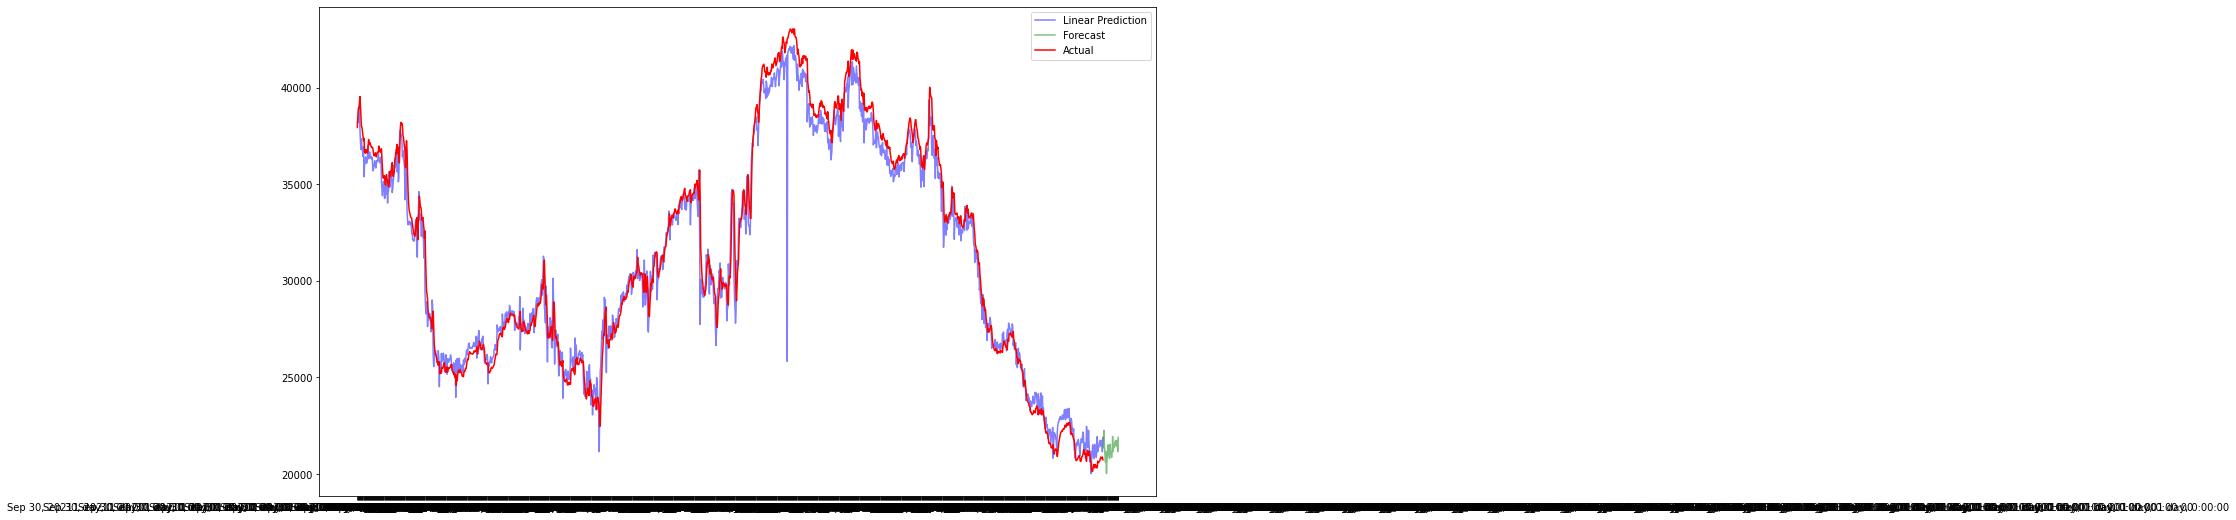

In [ ]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(data.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(data.index[display_at:], data['Price'][display_at:], label='Actual', color='red')
plt.legend()

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
pred_train_linear = regression_model.predict(X_train)
pred_test_linear = regression_model.predict(X_test)
print("Train error MSE: ", np.sqrt(mean_squared_error(y_train,pred_train_linear)))
print("Test error MSE: ",np.sqrt(mean_squared_error(y_test,pred_test_linear))) 
print("Rsquared train:",r2_score(y_train, pred_train_linear))
print("Rsquared train:", r2_score(y_test, pred_test_linear))
print(f'MAE Train:{mean_absolute_error(y_train, pred_train_linear)}')
print(f'MAE Test:{mean_absolute_error(y_test, pred_test_linear)}')

Train error MSE:  2405.69632433741
Test error MSE:  2473.778953171601
Rsquared train: 0.8503212241052535
Rsquared train: 0.8420114858605109
MAE Train:1876.449556093036
MAE Test:1888.7489422003673


##LSTM

In [ ]:
# Splitting to Training set and Test set
# timesplit= TimeSeriesSplit(n_splits=20)
# for train_index, test_index in timesplit.split(feature_transform):
#         X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
#         y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

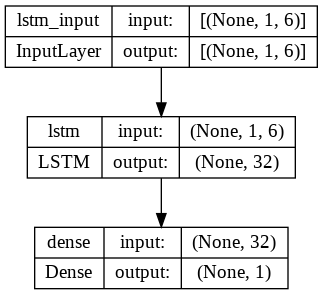

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
243/243 [==============================] - 2s 2ms/step - loss: nan
Epoch 2/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 3/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 5/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 6/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 7/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 8/100
243/243 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 10/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 11/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 12/100
243/243 [==============================] - 1s 2ms/step - loss: nan
Epoch 13/100
243/243 [===========================

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

16/16 [==============================] - 0s 1ms/step


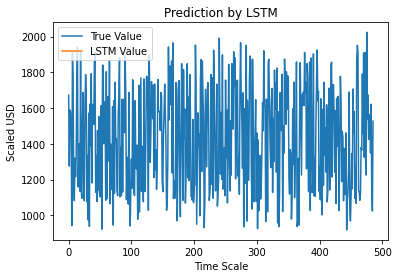

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          6.871e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:50:22   Log-Likelihood:                         -17888.
No. Observations:                1940   AIC:                                  3.579e+04
Df Residuals:                    1935   BIC:                                  3.581e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#Ridge

In [ ]:
# Defining the Ridge Regression Model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train) 

Ridge()

In [ ]:
# Score of the Ridge Regression Model (Using the Test Data)
ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score)

Ridge Model score: 0.8407466459840287


In [ ]:
# Define the Real & Prediction Values
ridge_model_predict_prediction = ridge_model.predict(X_predict)
ridge_model_real_prediction = ridge_model.predict(np.array(data.drop(['Prediction'], 1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


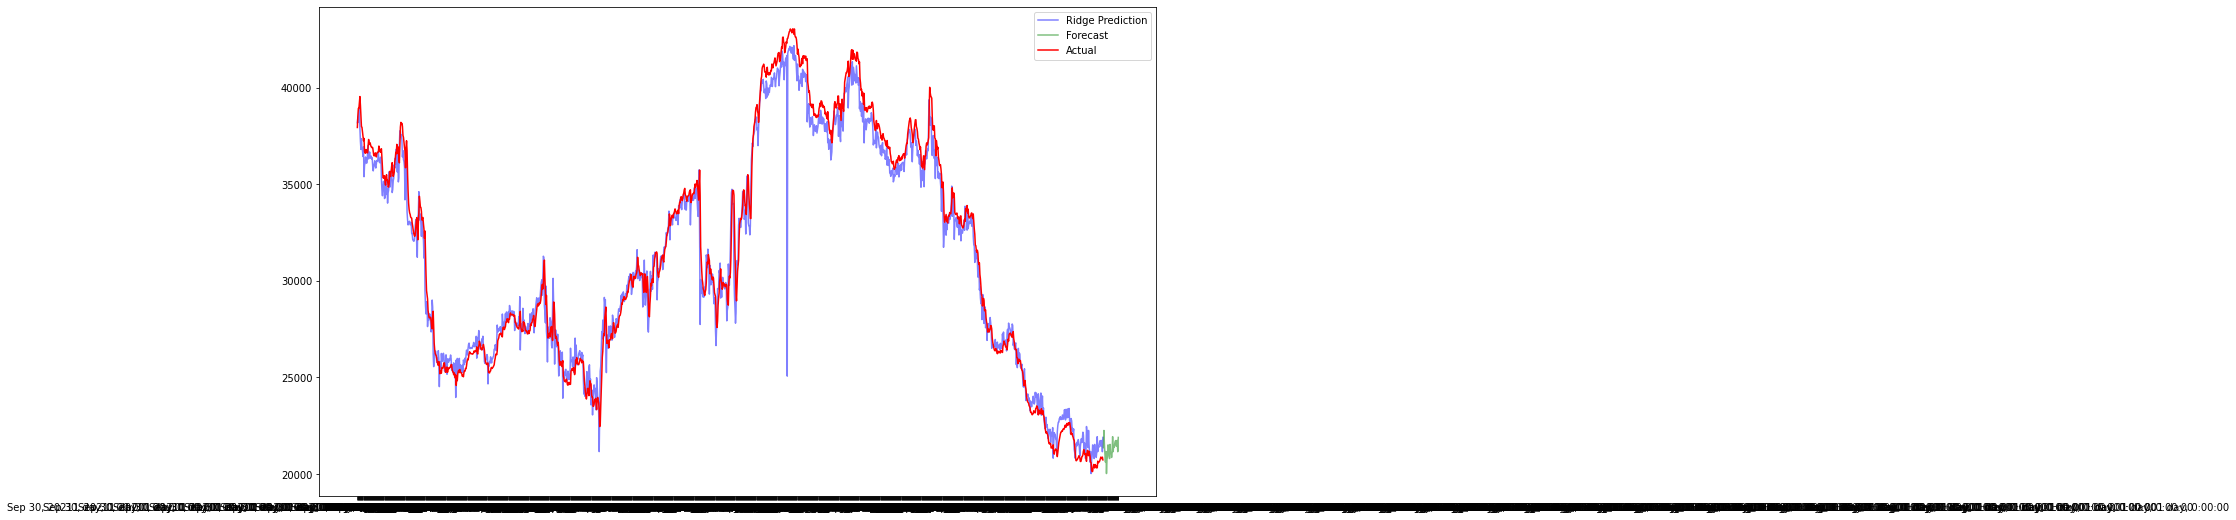

In [ ]:
# Plotting the Actual and Prediction Prices
plt.figure(figsize=(15, 9))
plt.plot(data.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(data.index[display_at:], data['Price'][display_at:], label='Actual', color='red')
plt.legend()

In [ ]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train) 
pred_train_ridge= ridge.predict(X_train)
print("Train error MSE: ", np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
pred_test_ridge= ridge.predict(X_test)
print("Test error MSE: ",np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print("Rsquared train:",r2_score(y_train, pred_train_ridge))
print("Rsquared train:", r2_score(y_test, pred_test_ridge))
print(f'MAE Train:{mean_absolute_error(y_train, pred_train_ridge)}')
print(f'MAE Test:{mean_absolute_error(y_test, pred_test_ridge)}')

Train error MSE:  2405.6963243708146
Test error MSE:  2473.8766660385354
Rsquared train: 0.8503212241010967
Rsquared train: 0.8419990047004413
MAE Train:1876.4499091558432
MAE Test:1888.7640152226854


#LASSO

In [ ]:
# Defining the Lasso Regression Model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.614e+09, tolerance: 7.501e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

In [ ]:
# Score of the Lasso Regression Model (Using the Test Data)
lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score)

Lasso Model score: 0.8544101465783943


In [ ]:
# Define the Real & Prediction Values
lasso_model_predict_prediction = lasso_model.predict(X_predict)
lasso_model_real_prediction = lasso_model.predict(np.array(data.drop(['Prediction'], 1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


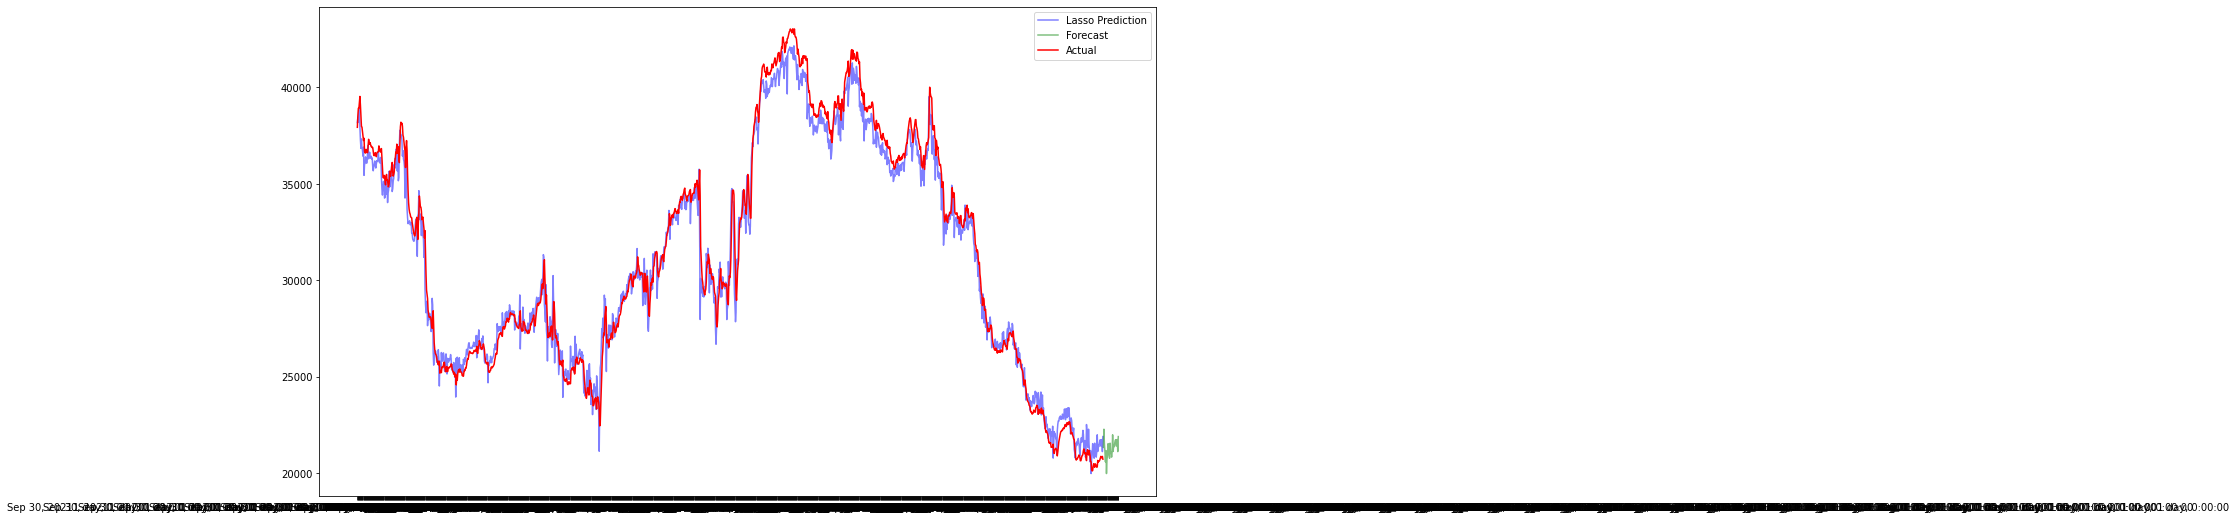

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(data.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Prediction', c='blue', alpha=alpha)
plt.plot(predicted_dates, lasso_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(data.index[display_at:], data['Price'][display_at:], label='Actual', color='red')
plt.legend()

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Train error MSE:",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
pred_test_lasso= model_lasso.predict(X_test)
print("Test error MSE:",  np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("Rsquared train:",r2_score(y_train, pred_train_lasso))
print("Rsquared test:",r2_score(y_test, pred_test_lasso))
print(f'MAE Train:{mean_absolute_error(y_train, pred_train_lasso)}')
print(f'MAE Test:{mean_absolute_error(y_test, pred_test_lasso)}');

Train error MSE: 2405.9048483451807
Test error MSE: 2374.445506868201
Rsquared train: 0.8502952748858011
Rsquared test: 0.85444465826244
MAE Train:1876.1028708100846
MAE Test:1860.380692452954


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.615e+09, tolerance: 7.501e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


#Elastic Net

In [ ]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print("Train error: ", np.sqrt(mean_squared_error(y_train,pred_train_enet)))
pred_test_enet= model_enet.predict(X_test)
print("Test error:",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("Rsquared train:",r2_score(y_train, pred_train_enet))
print("Rsquared train:",r2_score(y_test, pred_test_enet))
print(f'MAE Train:{mean_absolute_error(y_train, pred_train_enet)}')
print(f'MAE Test:{mean_absolute_error(y_test, pred_test_enet)}')

Train error:  2405.885677353644
Test error: 2375.6264420510265
Rsquared train: 0.8502976606630988
Rsquared train: 0.8542998377821391
MAE Train:1876.2385718836326
MAE Test:1862.2669445146369


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.616e+09, tolerance: 7.501e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# Score of the Lasso Regression Model (Using the Test Data)
elastic_model_score = model_enet.score(X_test, y_test)
print('Lasso Model score:', elastic_model_score)

Lasso Model score: 0.8542998377821391


In [ ]:
# Best Performance of the Regressor Models
best_score = max(linear_model_score, ridge_model_score, lasso_model_score,elastic_model_score)
index = np.argmax([linear_model_score, ridge_model_score, lasso_model_score, elastic_model_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model',
                  3: 'Elastic net'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Lasso Model with the score of 85.44101465783943%.


#Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute


In [ ]:
# X = data.iloc[:,1:]
# y = data.iloc[:,0]

###Improved model for LASSO

In [ ]:
#define cross-validation method to use
# cv = KFold(n_splits=2456, random_state=None, shuffle=False)

# #build multiple linear regression model
# model2 = Lasso()

# #use k-fold CV to evaluate model
# scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
#                          cv=cv, n_jobs=-1)

# #view mean absolute error
# sqrt(mean(absolute(scores)))

###Improved model for Linear Regression

In [ ]:
#define cross-validation method to use
# cv = KFold(n_splits=2456, random_state=None, shuffle=False)

# #build multiple linear regression model
# model2 = LinearRegression()

# #use k-fold CV to evaluate model
# scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
#                          cv=cv, n_jobs=-1)

# #view mean absolute error
# sqrt(mean(absolute(scores)))

2.8506804721094245

###Improved model for Rigde

In [ ]:
# #define cross-validation method to use
# cv = KFold(n_splits=2456, random_state=None, shuffle=False)

# #build multiple linear regression model
# model2 = Ridge()

# #use k-fold CV to evaluate model
# scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
#                          cv=cv, n_jobs=-1)

# #view mean absolute error
# sqrt(mean(absolute(scores)))

2.8506709088340623

#GARCH NN

In [ ]:
# #Import the dataset for the analysis 
# data1 = pd.read_csv("/content/log_data.csv" , thousands =',')

In [ ]:
import statsmodels.api as sm

In [ ]:
res = sm.tsa.ARMA(data["Price"], (1,1)).fit(disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [ ]:
#perform Ljung-Box test on residuals with lag=5
sm.stats.acorr_ljungbox(res.resid, lags=[5])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([19.82694959]), array([0.0013467]))

In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 12.9 MB/s 


In [ ]:
from arch.__future__ import reindexing

In [ ]:
from arch import arch_model
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')


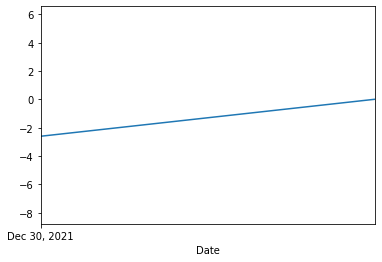

In [ ]:
import datetime as dt

import arch.data.sp500

st = dt.datetime(2012, 1, 1)
en = dt.datetime(2021, 1, 12)
# data = arch.data.sp500.load()
market = data["Price"]
returns = 100 * market.pct_change().dropna()
# realized_vol = returns.rolling(10).std()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [ ]:
returns.describe()

count    2456.000000
mean       -0.019878
std         1.027465
min        -8.078780
25%        -0.474266
50%         0.006983
75%         0.454313
max         5.863704
Name: Price, dtype: float64

In [ ]:
returns.to_csv("log1.csv", index= False)

In [ ]:
n_test = 10
train, test = returns[:-n_test], returns[-n_test:]

GARCH with constant Mean ; distribution = Normal

In [ ]:
from arch import arch_model
am = arch_model(train, vol='Garch', p=1, o=0, q=1, dist='Normal', rescale= True, mean='Zero')
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     27,   Neg. LLF: 3214.5093106684485
Iteration:     10,   Func. Count:     47,   Neg. LLF: 3200.845024760415
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3200.8450247614514
            Iterations: 10
            Function evaluations: 47
            Gradient evaluations: 10
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3200.85
Distribution:                  Normal   AIC:                           6407.69
Method:            Maximum Likelihood   BIC:                           6425.10
                                        No. Observations:                 2446
Date:                Sun, Nov 06 2022   Df Residuals:                     2446
Time:        

In [ ]:
# print("Train error: ", np.sqrt(mean_squared_error(train,yhat)))
# pred_test_enet= model_enet.predict(X_test)
# print("Test error:",np.sqrt(mean_squared_error(y_test,pred_test_enet)))

In [ ]:
# bic_garch = []
# for p in range(1, 5):
#   for q in range(1, 5):
#     garch = arch_model(returns, mean='zero',vol='GARCH', p=p, o=0, q=q)\
#             .fit(disp='off')
#     bic_garch.append(garch.bic)
#     if garch.bic == np.min(bic_garch):
#       best_param = p, q
# garch = arch_model(returns, mean='zero', vol='GARCH',
#                 p=best_param[0], o=0, q=best_param[1])\
#       .fit(disp='off')
# print(garch.summary())
# forecast = garch.forecast(start=split_date[0])
# forecast_garch = forecast

In [ ]:
# forecasts_irfm = am.forecast(horizon=5)
forecasts =res.forecast(horizon = 10, reindex = False)
forecast_garch = forecasts
# print(forecasts.variance.dropna().head())

In [ ]:
rmse_garch = np.sqrt(mse(realized_vol[-n_test:] / 100,
                                  np.sqrt(forecast_garch
                                  .variance.iloc[-n_test:].T
                                  / 100)))
print('The RMSE value of GARCH model is {:.4f}'.format(rmse_garch))

The RMSE value of GARCH model is 0.0909


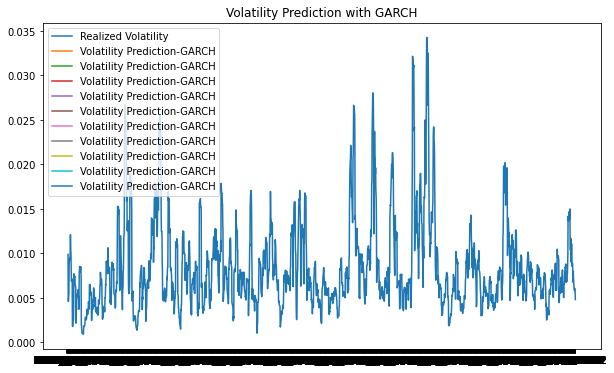

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(realized_vol / 100, label='Realized Volatility')
plt.plot(forecast_garch.variance.iloc[n_test:] / 100,
                  label='Volatility Prediction-GARCH')
plt.title('Volatility Prediction with GARCH', fontsize=12)
plt.legend()
plt.show()

GARCH with constant Mean ; distribution = Student T

In [ ]:
am2 = arch_model(returns, vol='Garch', p=1, o=0, q=1,dist="StudentsT", rescale= True, mean='Zero')
# am = arch_model(returns,dist="StudentsT")
res = am2.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     31,   Neg. LLF: 3119.688399349515
Iteration:     10,   Func. Count:     59,   Neg. LLF: 3109.8960751021446
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3109.8959181135133
            Iterations: 14
            Function evaluations: 78
            Gradient evaluations: 14
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3109.90
Distribution:      Standardized Student's t   AIC:                           6227.79
Method:                  Maximum Likelihood   BIC:                           6251.02
                                              No. Observations:                 2456
Date:                      Sun, Nov 06 2022   Df R

In [ ]:
forecasts2 =res.forecast(horizon = 10, reindex = False)
forecast_garch2 = forecasts2

In [ ]:
rmse_garch2 = np.sqrt(mse(realized_vol[-n_test:] / 100,
                                  np.sqrt(forecast_garch2
                                  .variance.iloc[-n_test:].T
                                  / 100)))
print('The RMSE value of GARCH model is {:.4f}'.format(rmse_garch2))

The RMSE value of GARCH model is 0.0875


EGARCH with Normal Distribution

In [ ]:
from arch import arch_model
am = arch_model(train, vol='EGarch', p=1, o=0, q=1, dist='Normal', rescale= True, mean='constant')
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     41,   Neg. LLF: 3189.9230764948265
Iteration:     10,   Func. Count:     66,   Neg. LLF: 3188.8388274021677
Iteration:     15,   Func. Count:     92,   Neg. LLF: 3188.8372562438335
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3188.8371631645987
            Iterations: 19
            Function evaluations: 117
            Gradient evaluations: 19
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3188.84
Distribution:                  Normal   AIC:                           6385.67
Method:            Maximum Likelihood   BIC:                           6408.88
                                        No. Observations:                 2446
Date:            

EGARCH with Student T Distribution

In [ ]:
am2 = arch_model(train, vol='EGarch', p=1, o=0, q=1,dist="StudentsT", rescale= False, mean='constant')
# am = arch_model(returns,dist="StudentsT")
res = am2.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     44,   Neg. LLF: 4861.068961449138
Iteration:     10,   Func. Count:     79,   Neg. LLF: 4682.117769260798
Iteration:     15,   Func. Count:    111,   Neg. LLF: 2960.2734030736383
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2960.2721456032427
            Iterations: 19
            Function evaluations: 134
            Gradient evaluations: 19
                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2960.27
Distribution:      Standardized Student's t   AIC:                           5930.54
Method:                  Maximum Likelihood   BIC:                           5959.55
                                              No. Observations

GJR GARCH with Normal distribution

In [ ]:
am = arch_model(returns, p=1, o=1, q=1,dist="Normal")
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3208.11
Distribution:                  Normal   AIC:                           6426.23
Method:            Maximum Likelihood   BIC:                           6455.26
                                        No. Observations:                 2456
Date:                Sun, Nov 06 2022   Df Residuals:                     2455
Time:                        13:45:53   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.8658e-04  1.804e-02 -3.806e-02      0.

In [ ]:
forecasts_J1 =res.forecast(horizon = 10, reindex = False)
forecast_Jgarch1 = forecasts_J1

In [ ]:
rmse_Jgarch1 = np.sqrt(mse(realized_vol[-n_test:] / 100,
                                  np.sqrt(forecast_Jgarch1
                                  .variance.iloc[-n_test:].T
                                  / 100)))
print('The RMSE value of GJR-GARCH model is {:.4f}'.format(rmse_Jgarch1))

The RMSE value of GJR-GARCH model is 0.0763


GJR GARCH with Student T distribution

In [ ]:
am = arch_model(returns, p=1, o=1, q=1,dist="StudentsT")
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3109.37
Distribution:      Standardized Student's t   AIC:                           6230.73
Method:                  Maximum Likelihood   BIC:                           6265.57
                                              No. Observations:                 2456
Date:                      Sun, Nov 06 2022   Df Residuals:                     2455
Time:                              13:48:40   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

In [ ]:
forecasts_J2 =res.forecast(horizon = 10, reindex = False)
forecast_Jgarch2 = forecasts_J2

In [ ]:
rmse_Jgarch2 = np.sqrt(mse(realized_vol[-n_test:] / 100,
                                  np.sqrt(forecast_Jgarch2
                                  .variance.iloc[-n_test:].T
                                  / 100)))
print('The RMSE value of GJR-GARCH model is {:.4f}'.format(rmse_Jgarch2))

The RMSE value of GJR-GARCH model is 0.0873


## AVGARCH

In [ ]:
from arch import arch_model
am = arch_model(returns,p=1, o=0, q=1, dist='Normal', mean='constant',rescale= True, power=1.0)
# am = arch_model(returns,dist="StudentsT")
AVres = am.fit(update_freq=5)
print(AVres.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 4113.931420726187
Iteration:     10,   Func. Count:     65,   Neg. LLF: 3201.2981164016146
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3201.2980011940344
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13
                    Constant Mean - AVGARCH Model Results                     
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    AVGARCH   Log-Likelihood:               -3201.30
Distribution:                  Normal   AIC:                           6410.60
Method:            Maximum Likelihood   BIC:                           6433.82
                                        No. Observations:                 2456
Date:                Sun, Nov 06 2022   Df Residuals:                     2455
Time:        

In [ ]:
AVres.params

mu          0.003846
omega       0.073747
alpha[1]    0.217951
beta[1]     0.763112
Name: params, dtype: float64

In [ ]:
forecasts_AV1 =res.forecast()
forecast_AVgarch1 = forecasts_AV1

In [ ]:
rmse_AVgarch1 = np.sqrt(mse(realized_vol[-n_test:] / 100,
                                  np.sqrt(forecast_AVgarch1
                                  .variance.iloc[-n_test:].T
                                  / 100)))
print('The RMSE value of GJR-GARCH model is {:.4f}'.format(rmse_AVgarch1))

In [ ]:
from arch import arch_model
am = arch_model(returns,p=1, o=0, q=1, dist='StudentsT', mean='constant',rescale= True, power=1.0)
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     41,   Neg. LLF: 3104.7398778619327
Iteration:     10,   Func. Count:     76,   Neg. LLF: 3096.926755933915
Iteration:     15,   Func. Count:    106,   Neg. LLF: 3096.7134453109393
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3096.7134453109393
            Iterations: 16
            Function evaluations: 111
            Gradient evaluations: 16
                       Constant Mean - AVGARCH Model Results                        
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                          AVGARCH   Log-Likelihood:               -3096.71
Distribution:      Standardized Student's t   AIC:                           6203.43
Method:                  Maximum Likelihood   BIC:                           6232.46
                                              No. Observation

### AVGARCH Neural Network

In [ ]:
data['log_price'] = np.log(data['Price']) #Firstly we should take the logarithmic return from prices

In [ ]:
data['pct_change'] = data['log_price'].diff() #after that let's take difference

In [ ]:
data['stdev'] = data['pct_change'].rolling(window=30, center=False).std()
data['Volatility'] = data['stdev'] * (252**0.5) # Annualize.

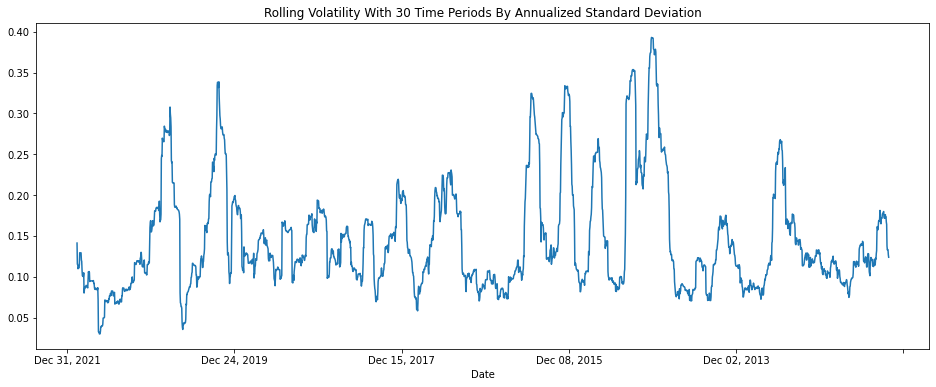

In [ ]:
plt.figure(figsize=(16,6))
data['Volatility'].plot()
plt.title("Rolling Volatility With 30 Time Periods By Annualized Standard Deviation")
plt.show()

In [ ]:
data = data.dropna()

In [ ]:
vol = data["Volatility"] * 100

In [ ]:
am = arch_model(vol,p=1, o=0, q=1, dist='StudentsT', mean='constant')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 2868.122526698806
Iteration:     10,   Func. Count:     71,   Neg. LLF: 2818.27494014749
Iteration:     15,   Func. Count:    101,   Neg. LLF: 2810.416343409229
Iteration:     20,   Func. Count:    131,   Neg. LLF: 2808.2171398672435
Iteration:     25,   Func. Count:    163,   Neg. LLF: 2807.9312883649577
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2807.9221648547273
            Iterations: 25
            Function evaluations: 173
            Gradient evaluations: 25
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   Volatility   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2807.92
Distribution:      Standardized Student's t   AIC:                           5625.84
Met

In [ ]:
# data['forecast_vol'] = 0.1 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.params['alpha[1]'] * res.resid + 
#                                    res.conditional_volatility**2 * res.params['beta[1]'])

In [ ]:
data['forecast_vol'] = 0.1 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + 
                                   res.conditional_volatility**2 * res.params['beta[1]'])

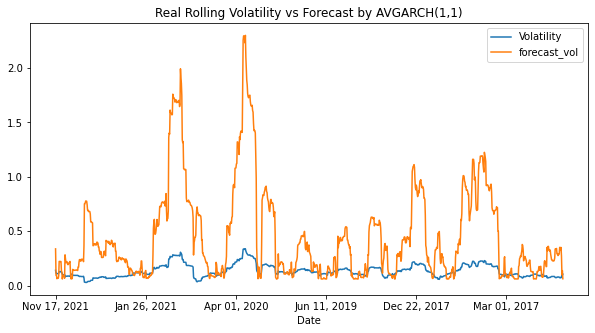

In [ ]:
plt.figure(figsize=(10,5))
data["Volatility"].plot()
data["forecast_vol"].plot()
plt.title("Real Rolling Volatility vs Forecast by AVGARCH(1,1)")
plt.legend()
plt.show()

In [ ]:
def rmse_tr(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
skor = rmse_tr(data.loc[data.index[1000:], 'forecast_vol'], data.loc[data.index[1000:], 'Price'])
print("Root Mean Squared Error of the model is calculated as ",skor)

Root Mean Squared Error of the model is calculated as  1184.5354342709838


In [ ]:
data.shape

(1126, 12)

In [ ]:
data= data.loc[:,['Price',	'Open',	'High',	'Low',	'Change %',	'Prediction',	'log_price',	'pct_change',	'stdev',	'forecast_vol','Volatility']]

In [ ]:
data.iloc[:, 10:11]

,Volatility
Date,
"Nov 17, 2021",0.141285
"Nov 16, 2021",0.115366
"Nov 15, 2021",0.115263
"Nov 12, 2021",0.109820
"Nov 11, 2021",0.111082
...,...
"Sep 02, 2016",0.073145
"Sep 01, 2016",0.081244
"Aug 31, 2016",0.099966


In [ ]:
training_set = data.iloc[:, 10:11].values
# 100 timestep ve 1 çıktı ile data yapısı oluşturalım
X_train = []
y_train = []
for i in range(1000, data.shape[0]):
    X_train.append(training_set[i-1000:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 10s 985ms/step - loss: 0.0075
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.0033
Epoch 3/100
4/4 [==============================] - 4s 996ms/step - loss: 9.6698e-04
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 6.1630e-04
Epoch 5/100
4/4 [==============================] - 4s 995ms/step - loss: 7.6773e-04
Epoch 6/100
4/4 [==============================] - 4s 1s/step - loss: 4.2022e-04
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 2.9387e-04
Epoch 8/100
4/4 [==============================] - 4s 1s/step - loss: 3.1254e-04
Epoch 9/100
4/4 [==============================] - 4s 1s/step - loss: 3.3525e-04
Epoch 10/100
4/4 [==============================] - 4s 1s/step - loss: 2.8676e-04
Epoch 11/100
4/4 [==============================] - 4s 1s/step - loss: 2.5005e-04
Epoch 12/100
4/4 [==============================] - 4s 1s/step - loss: 2.5678e-04
Epoch 13/100
4/4 [=====

In [56]:
regressor.save('my_modelp1.h5')

In [57]:
from keras.models import load_model
regressor = load_model('my_modelp1.h5')

In [58]:
predicted_stock_price = regressor.predict(X_train)

4/4 [==============================] - 2s 169ms/step


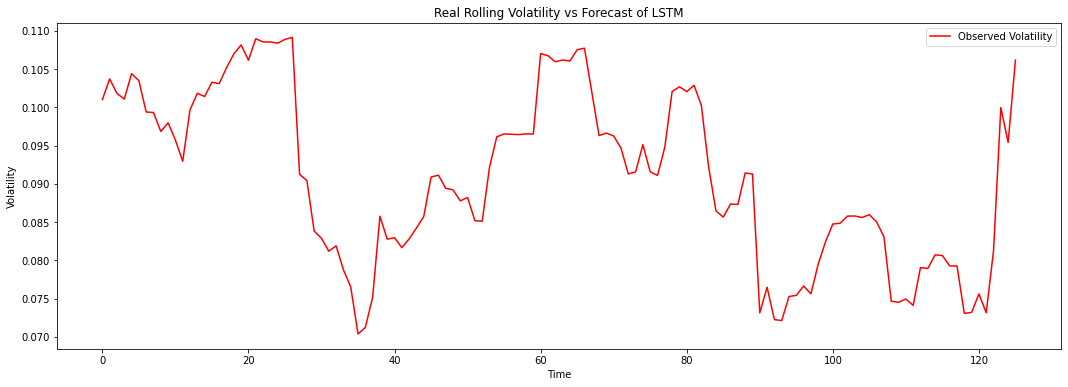

In [61]:
# Visualising the results
plt.figure(figsize=(18,6))
plt.plot(data.iloc[1000:, 10:11].values, color = 'red', label = 'Observed Volatility')
# plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Volatility By LSTM')
plt.title('Real Rolling Volatility vs Forecast of LSTM')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [ ]:
skor2 = rmse_tr(predicted_stock_price, np.array(data.loc[data.index[1000:], 'Volatility']))
print("Root Mean Squared Error of the model is calculated as ",skor2)

Root Mean Squared Error of the model is calculated as  0.015565859150196527


### Neural-Garch Model (Combining Garch(1,1) and LSTM)

In [ ]:
data.head(5)

,Price,Open,High,Low,Vol.,Change %,log_price,pct_change,stdev,Volatility,forecast_vol
Date,,,,,,,,,,,
"Nov 17, 2021",1766.30,1769.84,1773.33,1766.30,192.01,-0.23,7.476642,0.002806,0.008900,0.141285,0.324475
"Nov 16, 2021",1770.44,1774.57,1774.57,1769.91,358.92,-0.23,7.478983,0.002341,0.007267,0.115366,0.093618
"Nov 15, 2021",1774.57,1775.51,1777.71,1771.85,251.35,-0.05,7.481313,0.002330,0.007261,0.115263,0.092878
"Nov 12, 2021",1775.51,1789.66,1793.14,1775.42,256.92,-0.79,7.481843,0.000530,0.006918,0.109820,0.063674
"Nov 11, 2021",1789.66,1794.48,1794.48,1788.64,112.17,-0.27,7.489781,0.007938,0.006998,0.111082,0.068061


In [ ]:
data= data.loc[:,['Price',	'Open',	'High',	'Low',	'Change %',	'Prediction',	'log_price',	'pct_change',	'stdev',	'Volatility','forecast_vol']]

In [ ]:
data.iloc[:,-2]

Date
Nov 16, 2021    0.098477
Nov 15, 2021    0.100191
Nov 12, 2021    0.095856
Nov 11, 2021    0.098100
Nov 10, 2021    0.098132
                  ...   
Sep 02, 2016    0.071245
Sep 01, 2016    0.098010
Aug 31, 2016    0.131432
Aug 30, 2016    0.129520
Sep 23, 2015    0.109134
Name: Volatility, Length: 1105, dtype: float64

In [ ]:
training_set = data.iloc[:, -2:].values
# 100 timestep ve 1 çıktı ile data yapısı oluşturalım
X_train = []
y_train = []
for i in range(1000, data.shape[0]):
    X_train.append(training_set[i-1000:i,:])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
y_train

array([0.10101733, 0.10371928, 0.10182177, 0.1010821 , 0.10440459,
       0.10348395, 0.09939298, 0.09932388, 0.09684341, 0.09798257,
       0.09571969, 0.09295412, 0.09966675, 0.1018397 , 0.10141813,
       0.103286  , 0.10310275, 0.10518465, 0.106989  , 0.10815781,
       0.10616778, 0.10897677, 0.1085581 , 0.10855387, 0.10838852,
       0.10889573, 0.10913916, 0.09123553, 0.09043102, 0.08382284,
       0.08288279, 0.08119233, 0.08189153, 0.07876488, 0.0765345 ,
       0.07036641, 0.07121953, 0.07515871, 0.08576135, 0.08276422,
       0.08295353, 0.08165401, 0.08280293, 0.08422625, 0.08572571,
       0.09088282, 0.09113857, 0.08942107, 0.08921815, 0.08777845,
       0.08820834, 0.08518292, 0.08510683, 0.09217527, 0.09615359,
       0.09651985, 0.09647933, 0.09643842, 0.09653526, 0.09650905,
       0.10703355, 0.10675365, 0.10596262, 0.10619097, 0.10606252,
       0.10753425, 0.10773728, 0.10202066, 0.09631041, 0.09663773,
       0.09625476, 0.09466601, 0.09129592, 0.09155518, 0.09511

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))

In [ ]:
X_train

array([[[0.14128533, 0.26557775],
        [0.11536569, 0.06064482],
        [0.11526327, 0.06048919],
        ...,
        [0.12469771, 0.11618646],
        [0.12417752, 0.11193704],
        [0.12331105, 0.10500382]],

       [[0.11536569, 0.06064482],
        [0.11526327, 0.06048919],
        [0.10982034, 0.07372485],
        ...,
        [0.12417752, 0.11193704],
        [0.12331105, 0.10500382],
        [0.12035478, 0.08327181]],

       [[0.11526327, 0.06048919],
        [0.10982034, 0.07372485],
        [0.11108199, 0.06736482],
        ...,
        [0.12331105, 0.10500382],
        [0.12035478, 0.08327181],
        [0.11806132, 0.0697724 ]],

       ...,

       [[0.15922139, 0.4349671 ],
        [0.14562652, 0.30630127],
        [0.14508322, 0.30119084],
        ...,
        [0.15481641, 0.39314979],
        [0.16139403, 0.45562255],
        [0.15820041, 0.42526683]],

       [[0.14562652, 0.30630127],
        [0.14508322, 0.30119084],
        [0.15117751, 0.35868352],
        .

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 2)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'SGD', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 12s 1s/step - loss: 0.0044
Epoch 2/100
4/4 [==============================] - 5s 1s/step - loss: 0.0020
Epoch 3/100
4/4 [==============================] - 5s 1s/step - loss: 0.0015
Epoch 4/100
4/4 [==============================] - 5s 1s/step - loss: 8.1736e-04
Epoch 5/100
4/4 [==============================] - 5s 1s/step - loss: 7.1225e-04
Epoch 6/100
4/4 [==============================] - 5s 1s/step - loss: 5.9379e-04
Epoch 7/100
4/4 [==============================] - 6s 1s/step - loss: 4.4724e-04
Epoch 8/100
4/4 [==============================] - 5s 1s/step - loss: 3.3045e-04
Epoch 9/100
4/4 [==============================] - 5s 1s/step - loss: 4.0428e-04
Epoch 10/100
4/4 [==============================] - 5s 1s/step - loss: 4.1563e-04
Epoch 11/100
4/4 [==============================] - 5s 1s/step - loss: 4.0996e-04
Epoch 12/100
4/4 [==============================] - 5s 1s/step - loss: 4.2924e-04
Epoch 13/100
4/4 [==================

In [ ]:
regressor.save('my_modelp2.h5')

In [ ]:
from keras.models import load_model
regressor = load_model('my_modelp2.h5')

In [ ]:
predicted_stock_price = regressor.predict(X_train)

4/4 [==============================] - 2s 183ms/step


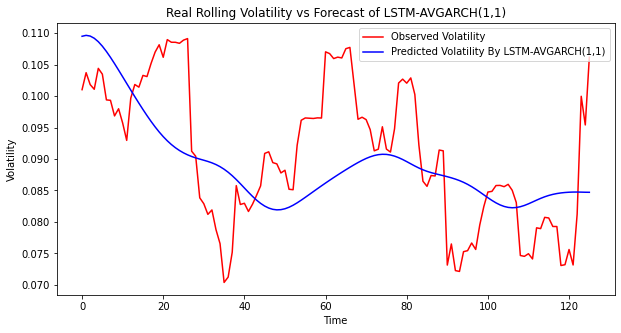

In [ ]:
# Visualising the results
plt.figure(figsize=(10,5))
plt.plot(data.iloc[1000:,9:10].values, color = 'red', label = 'Observed Volatility')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Volatility By LSTM-AVGARCH(1,1)')
plt.title('Real Rolling Volatility vs Forecast of LSTM-AVGARCH(1,1)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [ ]:
skor3 = rmse_tr(predicted_stock_price, np.array(data.loc[data.index[1000:], 'Volatility']))
print("Root Mean Squared Error of the model is calculated as ",skor3)

Root Mean Squared Error of the model is calculated as  0.013299392167093032
